In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Data Preparation (Pre-processing)

In [48]:
df = pd.read_csv('https://storage.googleapis.com/data-hotel/list-hotel/list-hotels.csv', encoding='unicode_escape')
df.head()

,id,hotel,stars,rating,reviews,harga,places_nearby,facil_+_akomod,food_and_drinks_list,hotel_services_list,...,things_to_do_list,accessibilty_list,connectivity_list,transportation_list,kids_and_pets_list,sports_and_recreations_list,shuttle_service_list,description,imageUrl,kota
0,0,Hotel Indonesia Kempinski Jakarta,5.0,8.9,4363,2.480.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nConcierge\nDoorman\nExpress check-in\...,...,Fitness center\nHealth club\nMassage\nOutdoor ...,Accessible bathroom\nAccessible parking\nRoll-...,INTERNATIONAL_CALL\nFree WiFi\nWiFi (surcharge),Car rental\nValet parking (surcharge),CRIBS\nHighchairs,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110110...,Jakarta
1,1,"The Langham, Jakarta",5.0,8.8,238,3.823.600,Nearby Places\n\nPig Me Up! - Ashta District 8...,Food and Drinks\nA la carte dinner\nA la carte...,A la carte dinner\nA la carte lunch\nBar\nBrea...,Bellhop\nConcierge\nDoorman\nFront desk\n24-ho...,...,Fitness center\nHealth club\nIndoor pool\nOutd...,NaN,Free WiFi,Secure parking\nValet parking,CRIBS,Fitness center,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110155...,Jakarta
2,2,Manhattan Hotel,5.0,8.5,8405,6.231.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Hotel Services\nBellhop\nConcierge\nMoney chan...,A la carte dinner\nA la carte lunch\nRestauran...,Bellhop\nConcierge\nMoney changer\nDoorman\nEa...,...,Fitness center\nOutdoor pool,Disabled access friendly\nAccessible bathroom\...,INTERNATIONAL_CALL\nLAN Internet (surcharge)\n...,Area shuttle\nParking with surcharge\nSecure p...,Babysitting,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070111170...,Jakarta
3,3,Aloft South Jakarta,4.0,8.9,424,762.3,Nearby Places\n\nSouthside Rooftop Bar & Loung...,Public Facilities\nParking\nCoffee shop\nEleva...,Bar\nPoolside bar\nBar,24-hour Receptionist\nLaundry service\nLuggage...,...,Fitness center\nGarden\nOutdoor pool,Disabled access friendly,NaN,Car rental,NaN,Billiard,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
4,4,"The Mayflower, Jakarta - Marriott Executive Ap...",5.0,9.0,393,1.756.254,Nearby Places\n\nSudirman Plaza\nBusiness\n2 m...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Welcoming drinks\nConcierge\nMoney changer\nDo...,...,Fitness center\nHealth club\nHot tub\nIndoor h...,NaN,Free WiFi,Airport transfer\nCar rental\nSecure parking\n...,CRIBS\nHighchairs\nFamily-friendly Facilities\...,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta


In [49]:
df.columns

Index(['id', 'hotel', 'stars', 'rating', 'reviews', 'harga', 'places_nearby',
       'facil_+_akomod', 'food_and_drinks_list', 'hotel_services_list',
       'in-room_facilities_list', 'business_facilities_list',
       'nearby_facilities_list', 'public_facilities_list', 'general_list',
       'things_to_do_list', 'accessibilty_list', 'connectivity_list',
       'transportation_list', 'kids_and_pets_list',
       'sports_and_recreations_list', 'shuttle_service_list', 'description',
       'imageUrl', 'kota'],
      dtype='object')

In [50]:
facilities_columns = ['Food and Drinks','Hotel Services','In-room Facilities', 'Business Facilities', 'Nearby Facilities',
                      'Public Facilities', 'General', 'Things to Do', 'Accessibilty', 'Connectivity', 'Transportation',
                      'Kids and Pets', 'Sports and Recreations', 'Shuttle Service']
ind = []
for i in range(len(df)):
    list_subfacil = {}
    facils = df['facil_+_akomod'][i].splitlines()
    facils = [facil for facil in facils if facil != '']
    
        
    for facil in list_subfacil:
        if facil not in facils:
            list_subfacil[facil] = []
    

    for facil in facils:     
        if facil in facilities_columns:
            main_facil = facil
            list_subfacil[main_facil] = []
        else:
            try:
                list_subfacil[main_facil] += [facil]
            except:
                pass
    ind.append(list_subfacil)

len(ind)

89

In [51]:
for index, facil in enumerate(ind):
    for key, value in facil.items():
        key2 = key.lower().split()
        key2 = '_'.join(key2)
        df.at[index, "{}_list".format(key2)] = '\n'.join(value)

df

,id,hotel,stars,rating,reviews,harga,places_nearby,facil_+_akomod,food_and_drinks_list,hotel_services_list,...,things_to_do_list,accessibilty_list,connectivity_list,transportation_list,kids_and_pets_list,sports_and_recreations_list,shuttle_service_list,description,imageUrl,kota
0,0,Hotel Indonesia Kempinski Jakarta,5.0,8.9,4363,2.480.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nConcierge\nDoorman\nExpress check-in\...,...,Fitness center\nHealth club\nMassage\nOutdoor ...,Accessible bathroom\nAccessible parking\nRoll-...,INTERNATIONAL_CALL\nFree WiFi\nWiFi (surcharge),Car rental\nValet parking (surcharge),CRIBS\nHighchairs,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110110...,Jakarta
1,1,"The Langham, Jakarta",5.0,8.8,238,3.823.600,Nearby Places\n\nPig Me Up! - Ashta District 8...,Food and Drinks\nA la carte dinner\nA la carte...,A la carte dinner\nA la carte lunch\nBar\nBrea...,Bellhop\nConcierge\nDoorman\nFront desk\n24-ho...,...,Fitness center\nHealth club\nIndoor pool\nOutd...,NaN,Free WiFi,Secure parking\nValet parking,CRIBS,Fitness center,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110155...,Jakarta
2,2,Manhattan Hotel,5.0,8.5,8405,6.231.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Hotel Services\nBellhop\nConcierge\nMoney chan...,A la carte dinner\nA la carte lunch\nRestauran...,Bellhop\nConcierge\nMoney changer\nDoorman\nEa...,...,Fitness center\nOutdoor pool,Disabled access friendly\nAccessible bathroom\...,INTERNATIONAL_CALL\nLAN Internet (surcharge)\n...,Area shuttle\nParking with surcharge\nSecure p...,Babysitting,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070111170...,Jakarta
3,3,Aloft South Jakarta,4.0,8.9,424,762.3,Nearby Places\n\nSouthside Rooftop Bar & Loung...,Public Facilities\nParking\nCoffee shop\nEleva...,Bar\nPoolside bar\nBar,24-hour Receptionist\nLaundry service\nLuggage...,...,Fitness center\nGarden\nOutdoor pool,Disabled access friendly,NaN,Car rental,NaN,Billiard,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
4,4,"The Mayflower, Jakarta - Marriott Executive Ap...",5.0,9.0,393,1.756.254,Nearby Places\n\nSudirman Plaza\nBusiness\n2 m...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Welcoming drinks\nConcierge\nMoney changer\nDo...,...,Fitness center\nHealth club\nHot tub\nIndoor h...,NaN,Free WiFi,Airport transfer\nCar rental\nSecure parking\n...,CRIBS\nHighchairs\nFamily-friendly Facilities\...,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,POP! Hotel Airport Jakarta,2.0,7.9,11026,"385.200,00",Nearby Places\r\n\r\nsTREATs Restaurant - Ibis...,Hotel Services\r\nBellhop\r\n24-hour security\...,NaN,Bellhop\n24-hour security\nLuggage storage\nMu...,...,Garden,Wheelchair accessible,Free WiFi,Airport transfer\nCar rental,NaN,NaN,Airport transfer,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070907142...,Jakarta
85,85,Sheraton Grand Jakarta Gandaria City Hotel,5.0,8.9,1511,"2.420.000,00",Nearby Places\r\n\r\nAnigre at Sheraton Gandar...,Food and Drinks\r\nA la carte breakfast\r\nA l...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nWelcoming drinks\nConcierge\nEarly Ch...,...,Outdoor pool,Disabled access friendly\nAccessible bathroom\...,Free WiFi,Airport transfer\nCar rental\nLimo or town car...,NaN,NaN,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imght

In [52]:
output_dataset = df
output_dataset

,id,hotel,stars,rating,reviews,harga,places_nearby,facil_+_akomod,food_and_drinks_list,hotel_services_list,...,things_to_do_list,accessibilty_list,connectivity_list,transportation_list,kids_and_pets_list,sports_and_recreations_list,shuttle_service_list,description,imageUrl,kota
0,0,Hotel Indonesia Kempinski Jakarta,5.0,8.9,4363,2.480.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nConcierge\nDoorman\nExpress check-in\...,...,Fitness center\nHealth club\nMassage\nOutdoor ...,Accessible bathroom\nAccessible parking\nRoll-...,INTERNATIONAL_CALL\nFree WiFi\nWiFi (surcharge),Car rental\nValet parking (surcharge),CRIBS\nHighchairs,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110110...,Jakarta
1,1,"The Langham, Jakarta",5.0,8.8,238,3.823.600,Nearby Places\n\nPig Me Up! - Ashta District 8...,Food and Drinks\nA la carte dinner\nA la carte...,A la carte dinner\nA la carte lunch\nBar\nBrea...,Bellhop\nConcierge\nDoorman\nFront desk\n24-ho...,...,Fitness center\nHealth club\nIndoor pool\nOutd...,NaN,Free WiFi,Secure parking\nValet parking,CRIBS,Fitness center,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110155...,Jakarta
2,2,Manhattan Hotel,5.0,8.5,8405,6.231.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Hotel Services\nBellhop\nConcierge\nMoney chan...,A la carte dinner\nA la carte lunch\nRestauran...,Bellhop\nConcierge\nMoney changer\nDoorman\nEa...,...,Fitness center\nOutdoor pool,Disabled access friendly\nAccessible bathroom\...,INTERNATIONAL_CALL\nLAN Internet (surcharge)\n...,Area shuttle\nParking with surcharge\nSecure p...,Babysitting,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070111170...,Jakarta
3,3,Aloft South Jakarta,4.0,8.9,424,762.3,Nearby Places\n\nSouthside Rooftop Bar & Loung...,Public Facilities\nParking\nCoffee shop\nEleva...,Bar\nPoolside bar\nBar,24-hour Receptionist\nLaundry service\nLuggage...,...,Fitness center\nGarden\nOutdoor pool,Disabled access friendly,NaN,Car rental,NaN,Billiard,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
4,4,"The Mayflower, Jakarta - Marriott Executive Ap...",5.0,9.0,393,1.756.254,Nearby Places\n\nSudirman Plaza\nBusiness\n2 m...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Welcoming drinks\nConcierge\nMoney changer\nDo...,...,Fitness center\nHealth club\nHot tub\nIndoor h...,NaN,Free WiFi,Airport transfer\nCar rental\nSecure parking\n...,CRIBS\nHighchairs\nFamily-friendly Facilities\...,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,POP! Hotel Airport Jakarta,2.0,7.9,11026,"385.200,00",Nearby Places\r\n\r\nsTREATs Restaurant - Ibis...,Hotel Services\r\nBellhop\r\n24-hour security\...,NaN,Bellhop\n24-hour security\nLuggage storage\nMu...,...,Garden,Wheelchair accessible,Free WiFi,Airport transfer\nCar rental,NaN,NaN,Airport transfer,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070907142...,Jakarta
85,85,Sheraton Grand Jakarta Gandaria City Hotel,5.0,8.9,1511,"2.420.000,00",Nearby Places\r\n\r\nAnigre at Sheraton Gandar...,Food and Drinks\r\nA la carte breakfast\r\nA l...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nWelcoming drinks\nConcierge\nEarly Ch...,...,Outdoor pool,Disabled access friendly\nAccessible bathroom\...,Free WiFi,Airport transfer\nCar rental\nLimo or town car...,NaN,NaN,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imght

In [53]:
output_dataset.to_csv('dataset_output.csv', index=False)

In [54]:
dp = pd.read_csv('https://storage.googleapis.com/data-hotel/list-hotel/dataset_output.csv')
dp

,id,hotel,stars,rating,reviews,harga,places_nearby,facil_+_akomod,food_and_drinks_list,hotel_services_list,...,things_to_do_list,accessibilty_list,connectivity_list,transportation_list,kids_and_pets_list,sports_and_recreations_list,shuttle_service_list,description,imageUrl,kota
0,0,Hotel Indonesia Kempinski Jakarta,5.0,8.9,4363,2.480.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nConcierge\nDoorman\nExpress check-in\...,...,Fitness center\nHealth club\nMassage\nOutdoor ...,Accessible bathroom\nAccessible parking\nRoll-...,INTERNATIONAL_CALL\nFree WiFi\nWiFi (surcharge),Car rental\nValet parking (surcharge),CRIBS\nHighchairs,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110110...,Jakarta
1,1,"The Langham, Jakarta",5.0,8.8,238,3.823.600,Nearby Places\n\nPig Me Up! - Ashta District 8...,Food and Drinks\nA la carte dinner\nA la carte...,A la carte dinner\nA la carte lunch\nBar\nBrea...,Bellhop\nConcierge\nDoorman\nFront desk\n24-ho...,...,Fitness center\nHealth club\nIndoor pool\nOutd...,NaN,Free WiFi,Secure parking\nValet parking,CRIBS,Fitness center,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070110155...,Jakarta
2,2,Manhattan Hotel,5.0,8.5,8405,6.231.500,Nearby Places\n\nJia Jia - Grand Indonesia (De...,Hotel Services\nBellhop\nConcierge\nMoney chan...,A la carte dinner\nA la carte lunch\nRestauran...,Bellhop\nConcierge\nMoney changer\nDoorman\nEa...,...,Fitness center\nOutdoor pool,Disabled access friendly\nAccessible bathroom\...,INTERNATIONAL_CALL\nLAN Internet (surcharge)\n...,Area shuttle\nParking with surcharge\nSecure p...,Babysitting,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070111170...,Jakarta
3,3,Aloft South Jakarta,4.0,8.9,424,762.3,Nearby Places\n\nSouthside Rooftop Bar & Loung...,Public Facilities\nParking\nCoffee shop\nEleva...,Bar\nPoolside bar\nBar,24-hour Receptionist\nLaundry service\nLuggage...,...,Fitness center\nGarden\nOutdoor pool,Disabled access friendly,NaN,Car rental,NaN,Billiard,NaN,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
4,4,"The Mayflower, Jakarta - Marriott Executive Ap...",5.0,9.0,393,1.756.254,Nearby Places\n\nSudirman Plaza\nBusiness\n2 m...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Welcoming drinks\nConcierge\nMoney changer\nDo...,...,Fitness center\nHealth club\nHot tub\nIndoor h...,NaN,Free WiFi,Airport transfer\nCar rental\nSecure parking\n...,CRIBS\nHighchairs\nFamily-friendly Facilities\...,Fitness center,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070112071...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,POP! Hotel Airport Jakarta,2.0,7.9,11026,"385.200,00",Nearby Places\r\n\r\nsTREATs Restaurant - Ibis...,Hotel Services\r\nBellhop\r\n24-hour security\...,NaN,Bellhop\n24-hour security\nLuggage storage\nMu...,...,Garden,Wheelchair accessible,Free WiFi,Airport transfer\nCar rental,NaN,NaN,Airport transfer,This Hotel offers ultimate comfort and luxury....,https://imghtlak.mmtcdn.com/hotels/20070907142...,Jakarta
85,85,Sheraton Grand Jakarta Gandaria City Hotel,5.0,8.9,1511,"2.420.000,00",Nearby Places\r\n\r\nAnigre at Sheraton Gandar...,Food and Drinks\r\nA la carte breakfast\r\nA l...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nWelcoming drinks\nConcierge\nEarly Ch...,...,Outdoor pool,Disabled access friendly\nAccessible bathroom\...,Free WiFi,Airport transfer\nCar rental\nLimo or town car...,NaN,NaN,Airport transfer (surcharge),This Hotel offers ultimate comfort and luxury....,https://imght

In [55]:
facilities_columns = ['Food and Drinks','Hotel Services','In-room Facilities', 'Business Facilities', 'Nearby Facilities', 'Public Facilities', 'General', 'Things to Do', 'Accessibilty', 'Connectivity', 'Transportation', 'Kids and Pets', 'Sports and Recreations', 'Shuttle Service']

facilities_columns.reverse()

for index , row in df.iterrows():
    
    # split per fasil and akomod
    arr = row['facil_+_akomod'].splitlines() 
    arr = [ar for ar in arr if ar != '']
    #iterate over fasil and akomod

    i = 0
    count = 0

    for  item in reversed(arr):
      count += 1
      if item in facilities_columns:
        df.at[index,item ] = count-1
        count = 0
        i += 1

In [56]:
# Replace Null Values
df = df.fillna(0)

In [57]:
for index , row in df.iterrows():
    
    # split per fasil and akomod
    arr = row['places_nearby'].splitlines() 
    
    #iterate over fasil and akomod

    i = 0
    count = 0
    
    for ind, item in enumerate(arr):
        itemsplits = item.split()
        for x in itemsplits:
            if x.isdigit():
                if itemsplits[1] == "km":
                    meters = itemsplits[0] * 1000
                else:
                    meters = itemsplits[0]
                    
                if meters.isdigit():
                    df.at[index,arr[ind-1]] = meters
                    #print(meters)

In [58]:
print(df.columns)

Index(['id', 'hotel', 'stars', 'rating', 'reviews', 'harga', 'places_nearby',
       'facil_+_akomod', 'food_and_drinks_list', 'hotel_services_list',
       'in-room_facilities_list', 'business_facilities_list',
       'nearby_facilities_list', 'public_facilities_list', 'general_list',
       'things_to_do_list', 'accessibilty_list', 'connectivity_list',
       'transportation_list', 'kids_and_pets_list',
       'sports_and_recreations_list', 'shuttle_service_list', 'description',
       'imageUrl', 'kota', 'Shuttle Service', 'Sports and Recreations',
       'Kids and Pets', 'Transportation', 'Connectivity', 'Accessibilty',
       'Things to Do', 'General', 'Public Facilities', 'Nearby Facilities',
       'Business Facilities', 'In-room Facilities', 'Hotel Services',
       'Food and Drinks', 'Fast Food', 'Shop & Gifts', 'Business',
       'Transportation Hub', 'Casual Dining', 'Nightlife', 'Park & Zoo',
       'Public Service', 'Arts & Sciences', 'Fine Dining', 'Sport',
       'Quick 

In [59]:
df.harga = df['harga'].str.replace('.','', regex = True)
df.harga = df['harga'].str.replace(',','.', regex = True)
df.harga = df['harga'].astype(float).astype(int)

df.reviews = df['reviews'].str.replace('.','', regex = True)
df.reviews = df['reviews'].str.replace(',','.', regex = True)
df.reviews = df['reviews'].astype(float).astype(int)

In [60]:
# Replace Place Nearby
df = df.fillna(10000)

In [61]:
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [62]:
df.dtypes

id                               int64
hotel                          float64
stars                          float64
rating                         float64
reviews                          int64
harga                            int64
places_nearby                  float64
facil_+_akomod                 float64
food_and_drinks_list           float64
hotel_services_list            float64
in-room_facilities_list        float64
business_facilities_list       float64
nearby_facilities_list         float64
public_facilities_list         float64
general_list                   float64
things_to_do_list              float64
accessibilty_list              float64
connectivity_list              float64
transportation_list            float64
kids_and_pets_list             float64
sports_and_recreations_list    float64
shuttle_service_list           float64
description                    float64
imageUrl                       float64
kota                           float64
Shuttle Service          

In [63]:
df

,id,hotel,stars,rating,reviews,harga,places_nearby,facil_+_akomod,food_and_drinks_list,hotel_services_list,...,Fine Dining,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark
0,0,NaN,5.0,8.9,4363,2480500,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,1,NaN,5.0,8.8,238,3823600,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,2,NaN,5.0,8.5,8405,6231500,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,3,NaN,4.0,8.9,424,7623,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,4,NaN,5.0,9.0,393,1756254,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,NaN,2.0,7.9,11026,385200,NaN,NaN,0.0,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
85,85,NaN,5.0,8.9,1511,2420000,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
86,86,NaN,4.0,7.8,517,688000,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
87,87,NaN,4.0,8.4,2717,431250,NaN,NaN,NaN,NaN,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [64]:
# df.to_csv('data_preprocess.csv', index=False)

## Splitting Data

In [65]:
df.columns

Index(['id', 'hotel', 'stars', 'rating', 'reviews', 'harga', 'places_nearby',
       'facil_+_akomod', 'food_and_drinks_list', 'hotel_services_list',
       'in-room_facilities_list', 'business_facilities_list',
       'nearby_facilities_list', 'public_facilities_list', 'general_list',
       'things_to_do_list', 'accessibilty_list', 'connectivity_list',
       'transportation_list', 'kids_and_pets_list',
       'sports_and_recreations_list', 'shuttle_service_list', 'description',
       'imageUrl', 'kota', 'Shuttle Service', 'Sports and Recreations',
       'Kids and Pets', 'Transportation', 'Connectivity', 'Accessibilty',
       'Things to Do', 'General', 'Public Facilities', 'Nearby Facilities',
       'Business Facilities', 'In-room Facilities', 'Hotel Services',
       'Food and Drinks', 'Fast Food', 'Shop & Gifts', 'Business',
       'Transportation Hub', 'Casual Dining', 'Nightlife', 'Park & Zoo',
       'Public Service', 'Arts & Sciences', 'Fine Dining', 'Sport',
       'Quick 

In [66]:
df = df.drop(df.columns[[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], axis=1)
df.head()

,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Fine Dining,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark
0,5.0,8.9,4363,2480500,1.0,1.0,2.0,2.0,3.0,4.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,5.0,8.8,238,3823600,0.0,1.0,1.0,2.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,5.0,8.5,8405,6231500,1.0,1.0,1.0,5.0,4.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,4.0,8.9,424,7623,0.0,1.0,0.0,1.0,0.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,5.0,9.0,393,1756254,1.0,1.0,4.0,4.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [67]:
df.to_csv('clean_data.csv', index=False)

In [68]:
X = df[['stars','reviews','harga', 'Shuttle Service', 'Sports and Recreations', 'Kids and Pets', 'Transportation', 'Connectivity', 'Accessibilty', 'Things to Do', 'General', 'Public Facilities', 'Nearby Facilities', 'Business Facilities', 'In-room Facilities', 'Hotel Services', 'Food and Drinks', 'Fast Food', 'Shop & Gifts', 'Business', 'Transportation Hub', 'Casual Dining', 'Nightlife', 'Park & Zoo', 'Public Service', 'Arts & Sciences', 'Fine Dining', 'Sport', 'Quick Bites', 'Education', 'Street Food', 'Activity & Games', 'Cafe', 'Entertainment', 'Food Court', 'Sight & Landmark' ]]
y = df['rating']

In [69]:
df.columns

Index(['stars', 'rating', 'reviews', 'harga', 'Shuttle Service',
       'Sports and Recreations', 'Kids and Pets', 'Transportation',
       'Connectivity', 'Accessibilty', 'Things to Do', 'General',
       'Public Facilities', 'Nearby Facilities', 'Business Facilities',
       'In-room Facilities', 'Hotel Services', 'Food and Drinks', 'Fast Food',
       'Shop & Gifts', 'Business', 'Transportation Hub', 'Casual Dining',
       'Nightlife', 'Park & Zoo', 'Public Service', 'Arts & Sciences',
       'Fine Dining', 'Sport', 'Quick Bites', 'Education', 'Street Food',
       'Activity & Games', 'Cafe', 'Entertainment', 'Food Court',
       'Sight & Landmark'],
      dtype='object')

# Weighted Ranking

## Data Splitting

In [70]:
df

,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Fine Dining,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark
0,5.0,8.9,4363,2480500,1.0,1.0,2.0,2.0,3.0,4.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,5.0,8.8,238,3823600,0.0,1.0,1.0,2.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,5.0,8.5,8405,6231500,1.0,1.0,1.0,5.0,4.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,4.0,8.9,424,7623,0.0,1.0,0.0,1.0,0.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,5.0,9.0,393,1756254,1.0,1.0,4.0,4.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2.0,7.9,11026,385200,1.0,0.0,0.0,2.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
85,5.0,8.9,1511,2420000,1.0,0.0,0.0,6.0,1.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
86,4.0,7.8,517,688000,0.0,0.0,0.0,0.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
87,4.0,8.4,2717,431250,1.0,1.0,0.0,3.0,2.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [71]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
dev_X, val_X, dev_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
train_dataset = df.loc[:70]
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('rating')
test_labels = test_features.pop('rating')

# Modelling

## Hyperparameter

In [73]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[4.2816901e+00 2.4317466e+03 1.4929205e+06 7.3239440e-01 1.2957746e+00
  5.3521127e-01 2.5070422e+00 1.7746480e+00 2.1549296e+00 4.4788733e+00
  5.9718308e+00 9.0000000e+00 4.0985913e+00 4.3380280e+00 7.2816901e+00
  9.5915489e+00 9.3661976e+00 9.5789727e+03 2.8839155e+03 3.0320562e+03
  3.7190706e+03 2.1346338e+03 9.8607891e+03 9.5860977e+03 7.4591831e+03
  9.3296055e+03 9.4377754e+03 9.7351133e+03 9.8595781e+03 8.7858164e+03
  9.7189004e+03 9.5949570e+03 9.4380703e+03 9.7323945e+03 9.8594512e+03
  9.7262676e+03]]


In [74]:
regularizer = 0.000001
dropout = 0.25
schedul = -0.0001
lr = 0.001

In [75]:
optimizer = tf.optimizers.Adam(learning_rate=lr)

In [76]:
df

,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Fine Dining,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark
0,5.0,8.9,4363,2480500,1.0,1.0,2.0,2.0,3.0,4.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,5.0,8.8,238,3823600,0.0,1.0,1.0,2.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,5.0,8.5,8405,6231500,1.0,1.0,1.0,5.0,4.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,4.0,8.9,424,7623,0.0,1.0,0.0,1.0,0.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,5.0,9.0,393,1756254,1.0,1.0,4.0,4.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2.0,7.9,11026,385200,1.0,0.0,0.0,2.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
85,5.0,8.9,1511,2420000,1.0,0.0,0.0,6.0,1.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
86,4.0,7.8,517,688000,0.0,0.0,0.0,0.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
87,4.0,8.4,2717,431250,1.0,1.0,0.0,3.0,2.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


## Model

In [77]:
def scale_model(norm):
      model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(regularizer)),
      layers.Dropout(dropout),
      layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(regularizer)),
      layers.Dropout(dropout),
      layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularizer)),
      layers.Dropout(dropout),
      layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularizer)),
      layers.Dropout(dropout),
      layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularizer)),
      layers.Dropout(dropout),
      layers.Dense(1)
      ])
      
      return model

In [78]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(schedul)

In [79]:
def DNN_Pipeline (model):
    
    model.compile(optimizer= optimizer, loss='mean_absolute_error')
    
    history = model.fit(
              train_features,
              train_labels,
              validation_split=0.2,
              callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler),
              verbose=0, epochs=300)
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 3])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    print(hist.tail(10))
    
    return model

         loss  val_loss        lr  epoch
290  0.741500  0.230858  0.000972    290
291  0.586823  0.251713  0.000972    291
292  0.795948  0.264593  0.000972    292
293  0.811572  0.210750  0.000972    293
294  0.785331  0.399778  0.000972    294
295  0.791895  0.675583  0.000972    295
296  0.672770  0.675672  0.000972    296
297  0.608620  0.473391  0.000972    297
298  0.673454  0.211038  0.000972    298
299  0.668133  0.209131  0.000971    299


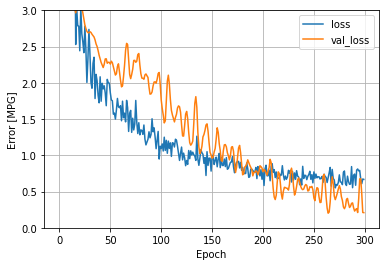

In [80]:
scale = DNN_Pipeline(scale_model(normalizer))

## Rank Predict

In [81]:
# Rank train datasets
scale.predict(train_features)

array([[8.561186 ],
       [8.6294365],
       [8.514138 ],
       [8.40549  ],
       [8.633581 ],
       [8.730853 ],
       [8.643613 ],
       [8.550736 ],
       [8.725077 ],
       [8.542422 ],
       [8.517738 ],
       [8.691543 ],
       [8.568065 ],
       [8.653993 ],
       [8.676102 ],
       [8.566632 ],
       [8.624899 ],
       [8.50587  ],
       [8.690237 ],
       [8.68967  ],
       [8.564677 ],
       [8.54452  ],
       [8.560167 ],
       [8.619098 ],
       [8.565562 ],
       [8.554967 ],
       [8.540831 ],
       [8.560167 ],
       [8.666375 ],
       [8.615701 ],
       [8.66142  ],
       [8.485897 ],
       [8.659184 ],
       [8.29701  ],
       [8.71855  ],
       [8.748264 ],
       [8.736934 ],
       [8.699283 ],
       [8.453575 ],
       [8.649483 ],
       [8.388345 ],
       [8.686376 ],
       [8.677357 ],
       [8.508149 ],
       [8.429532 ],
       [8.592307 ],
       [8.663254 ],
       [8.553911 ],
       [8.587497 ],
       [8.6129465],


In [82]:
scale.save("model_user.h5")

In [83]:
df_rank = train_dataset
df_rank['predict_score'] = scale.predict(train_features)
# df_rank

new_sorted = df_rank.sort_values(by=['predict_score'], ascending=False)
new_sorted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark,predict_score
58,4.0,8.6,3,432,5.0,1.0,1.0,8.0,3.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,9.176953
64,0.0,8.8,154,914640,0.0,0.0,0.0,0.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.916144
61,4.0,8.5,4399,705000,1.0,1.0,0.0,3.0,4.0,2.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.807639
59,4.0,8.6,8315,595000,3.0,4.0,1.0,4.0,3.0,5.0,...,10000,10000,784,10000,10000,10000,10000,10000,10000,8.778399
35,4.0,8.6,4,1077800,1.0,1.0,0.0,3.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.748264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,5.0,8.5,7,85085,1.0,1.0,0.0,5.0,3.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.429532
3,4.0,8.9,424,7623,0.0,1.0,0.0,1.0,0.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.405490
53,4.0,8.0,5,475,0.0,4.0,0.0,1.0,1.0,0.0,...,10000,10000,142,10000,10000,10000,10000,10000,10000,8.390703
40,4.0,8.5,1,74778,0.0,1.0,0.0,0.0,1.0,3.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.388345


## JSON Input test

Flask : API model untuk bisa terima json

In [84]:
import json

jsondata = {"key": ['Transportation', 'Connectivity', 'Shuttle Service']}
input_data = json.dumps(jsondata)
print(input_data)

{"key": ["Transportation", "Connectivity", "Shuttle Service"]}


In [85]:
import pandas as pd
def user (input):
  test = pd.read_json(input)
  test = test['key']
  return test

In [86]:
test = user(input_data)
test

0     Transportation
1       Connectivity
2    Shuttle Service
Name: key, dtype: object

In [87]:
'''
at1 = test.iat[0]

df['{}'.format(at1)]
'''

"\nat1 = test.iat[0]\n\ndf['{}'.format(at1)]\n"

In [88]:
'''
def count_references_score(columns,df = new_sorted):
    
    places_columns = ['Fast Food', 'Shop & Gifts', 'Business',
       'Transportation Hub', 'Casual Dining', 'Nightlife', 'Park & Zoo',
       'Public Service', 'Arts & Sciences', 'Fine Dining', 'Sport',
       'Quick Bites', 'Education', 'Street Food', 'Activity & Games', 'Cafe',
       'Entertainment', 'Food Court', 'Sight & Landmark']
    
    columns_number = len(columns)
    
    c = 0
    score = []
    total_score = []
    
    for x in columns: 
        
        if x in places_columns:
            
            for j in df[x]:
                
                places_value = 1-(j/15000) 
                score.append(places_value)
                
            if c == 0:
                total_score = score
            else:
                total_score = np.add(score,total_score)
        
        else:
            max_count = df[x].max()
            
            for y in df[x]:
                score.append(y/max_count)

            if c == 0:
                total_score = score
            else:
                total_score = np.add(score,total_score)

        c =+1
        score = []
        
    return ((total_score/columns_number)*100  )
    '''

"\ndef count_references_score(columns,df = new_sorted):\n    \n    places_columns = ['Fast Food', 'Shop & Gifts', 'Business',\n       'Transportation Hub', 'Casual Dining', 'Nightlife', 'Park & Zoo',\n       'Public Service', 'Arts & Sciences', 'Fine Dining', 'Sport',\n       'Quick Bites', 'Education', 'Street Food', 'Activity & Games', 'Cafe',\n       'Entertainment', 'Food Court', 'Sight & Landmark']\n    \n    columns_number = len(columns)\n    \n    c = 0\n    score = []\n    total_score = []\n    \n    for x in columns: \n        \n        if x in places_columns:\n            \n            for j in df[x]:\n                \n                places_value = 1-(j/15000) \n                score.append(places_value)\n                \n            if c == 0:\n                total_score = score\n            else:\n                total_score = np.add(score,total_score)\n        \n        else:\n            max_count = df[x].max()\n            \n            for y in df[x]:\n             

In [89]:
# count_references_score(['Transportation'])
# print(count_references_score)


In [90]:
test.iat[0]

'Transportation'

In [91]:
#ambil data
weights = []
for index, row in new_sorted.iterrows():
  for i in range(len(test)):
    weights.append(new_sorted['{}'.format(test.iat[i])])

len(weights)
for i in range(len(test)):
  weights[i] = weights[i] / new_sorted['{}'.format(test.iat[i])].max()
  # weights[i] = weights[i] * 2

weights = weights[:len(test)]
weights

[58    0.8
 64    0.0
 61    0.3
 59    0.4
 35    0.3
      ... 
 44    0.5
 3     0.1
 53    0.1
 40    0.0
 33    0.3
 Name: Transportation, Length: 71, dtype: float64, 58    0.428571
 64    0.142857
 61    0.571429
 59    0.428571
 35    0.142857
         ...   
 44    0.428571
 3     0.000000
 53    0.142857
 40    0.142857
 33    0.142857
 Name: Connectivity, Length: 71, dtype: float64, 58    1.0
 64    0.0
 61    0.2
 59    0.6
 35    0.2
      ... 
 44    0.2
 3     0.0
 53    0.0
 40    0.0
 33    0.0
 Name: Shuttle Service, Length: 71, dtype: float64]

In [92]:
new_sorted

,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark,predict_score
58,4.0,8.6,3,432,5.0,1.0,1.0,8.0,3.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,9.176953
64,0.0,8.8,154,914640,0.0,0.0,0.0,0.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.916144
61,4.0,8.5,4399,705000,1.0,1.0,0.0,3.0,4.0,2.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.807639
59,4.0,8.6,8315,595000,3.0,4.0,1.0,4.0,3.0,5.0,...,10000,10000,784,10000,10000,10000,10000,10000,10000,8.778399
35,4.0,8.6,4,1077800,1.0,1.0,0.0,3.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.748264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,5.0,8.5,7,85085,1.0,1.0,0.0,5.0,3.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.429532
3,4.0,8.9,424,7623,0.0,1.0,0.0,1.0,0.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.405490
53,4.0,8.0,5,475,0.0,4.0,0.0,1.0,1.0,0.0,...,10000,10000,142,10000,10000,10000,10000,10000,10000,8.390703
40,4.0,8.5,1,74778,0.0,1.0,0.0,0.0,1.0,3.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.388345


In [93]:
for i in range(len(test)):
  new_sorted['{}'.format(test.iat[i])] = weights[i].values
new_sorted

,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark,predict_score
58,4.0,8.6,3,432,1.0,1.0,1.0,0.8,0.428571,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,9.176953
64,0.0,8.8,154,914640,0.0,0.0,0.0,0.0,0.142857,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.916144
61,4.0,8.5,4399,705000,0.2,1.0,0.0,0.3,0.571429,2.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.807639
59,4.0,8.6,8315,595000,0.6,4.0,1.0,0.4,0.428571,5.0,...,10000,10000,784,10000,10000,10000,10000,10000,10000,8.778399
35,4.0,8.6,4,1077800,0.2,1.0,0.0,0.3,0.142857,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.748264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,5.0,8.5,7,85085,0.2,1.0,0.0,0.5,0.428571,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.429532
3,4.0,8.9,424,7623,0.0,1.0,0.0,0.1,0.000000,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.405490
53,4.0,8.0,5,475,0.0,4.0,0.0,0.1,0.142857,0.0,...,10000,10000,142,10000,10000,10000,10000,10000,10000,8.390703
40,4.0,8.5,1,74778,0.0,1.0,0.0,0.0,0.142857,3.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,8.388345


##Score Fix

In [94]:
#Score Fix
df_test = new_sorted[test]
df_test['predict_score'] = new_sorted['predict_score']
df_test = df_test[:70]
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Transportation,Connectivity,Shuttle Service,predict_score
58,0.8,0.428571,1.0,9.176953
64,0.0,0.142857,0.0,8.916144
61,0.3,0.571429,0.2,8.807639
59,0.4,0.428571,0.6,8.778399
35,0.3,0.142857,0.2,8.748264
...,...,...,...,...
67,0.0,0.142857,0.0,8.444834
44,0.5,0.428571,0.2,8.429532
3,0.1,0.000000,0.0,8.405490
53,0.1,0.142857,0.0,8.390703


In [95]:
df_test['final_score'] = df_test.sum(axis=1)
df_test

,Transportation,Connectivity,Shuttle Service,predict_score,final_score
58,0.8,0.428571,1.0,9.176953,11.405525
64,0.0,0.142857,0.0,8.916144,9.059002
61,0.3,0.571429,0.2,8.807639,9.879068
59,0.4,0.428571,0.6,8.778399,10.206971
35,0.3,0.142857,0.2,8.748264,9.391121
...,...,...,...,...,...
67,0.0,0.142857,0.0,8.444834,8.587691
44,0.5,0.428571,0.2,8.429532,9.558103
3,0.1,0.000000,0.0,8.405490,8.505490
53,0.1,0.142857,0.0,8.390703,8.633560


In [96]:
output_dataset['final_score'] = df_test['final_score']
output_dataset = output_dataset.sort_values(by=['final_score'], ascending=False)

In [97]:
output_dataset

,id,hotel,stars,rating,reviews,harga,places_nearby,facil_+_akomod,food_and_drinks_list,hotel_services_list,...,Accessibilty,Things to Do,General,Public Facilities,Nearby Facilities,Business Facilities,In-room Facilities,Hotel Services,Food and Drinks,final_score
58,58,All Sedayu Hotel Kelapa Gading,4.0,8.6,"3,747",432,Nearby Places\nHoghock - Mall of Indonesia\nCa...,Food and Drinks\n\n A la carte dinner\n ...,A la carte dinner\n A la carte lunch\n ...,Bellhop\n Welcoming drinks\n Concier...,...,6.0,6.0,5.0,8.0,7.0,8.0,10.0,18.0,23.0,11.405525
30,30,The Sultan Hotel & Residence Jakarta,5.0,8.6,7.007,1.597.200,Nearby Places\nLagoon Cafe at The Sultan Hotel...,Facilities\nFood and Drinks\n\n A la carte ...,A la carte breakfast\n A la carte dinne...,Bellhop\n Welcoming drinks\n Concier...,...,1.0,6.0,8.0,12.0,5.0,10.0,12.0,21.0,34.0,10.861420
59,59,Swiss-Belresidences Kalibata,4.0,8.6,8315,"595.000,00",Nearby Places\r\nSwiss Cafe at Swiss-Belreside...,Food and Drinks\nA la carte breakfast\nA la ca...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nConcierge\nFront desk\n24-hour Recept...,...,5.0,9.0,10.0,14.0,8.0,6.0,8.0,13.0,27.0,10.206971
60,60,Wyndham Casablanca Jakarta,5.0,8.8,3430,"874.999,00",Nearby Places\r\n\r\nRiva Grill Bar & Terrace ...,Food and Drinks\r\nA la carte breakfast\r\nA l...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nWelcoming drinks\nConcierge\nMoney ch...,...,5.0,13.0,9.0,12.0,5.0,7.0,14.0,18.0,25.0,10.193282
5,5,Merlynn Park Hotel,5.0,8.6,18892,820,Nearby Places\n\nMan Aur Tan at Merlynn Park H...,Hotel Services\nBellhop\nConcierge\nMoney chan...,Restaurant with AC\nBar\nBreakfast\nBreakfast ...,Bellhop\nConcierge\nMoney changer\nDoorman\nEa...,...,6.0,7.0,7.0,11.0,6.0,10.0,12.0,16.0,10.0,10.187996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,POP! Hotel Airport Jakarta,2.0,7.9,11026,"385.200,00",Nearby Places\r\n\r\nsTREATs Restaurant - Ibis...,Hotel Services\r\nBellhop\r\n24-hour security\...,NaN,Bellhop\n24-hour security\nLuggage storage\nMu...,...,1.0,1.0,3.0,4.0,5.0,4.0,5.0,6.0,NaN,NaN
85,85,Sheraton Grand Jakarta Gandaria City Hotel,5.0,8.9,1511,"2.420.000,00",Nearby Places\r\n\r\nAnigre at Sheraton Gandar...,Food and Drinks\r\nA la carte breakfast\r\nA l...,A la carte breakfast\nA la carte dinner\nA la ...,Bellhop\nWelcoming drinks\nConcierge\nEarly Ch...,...,6.0,1.0,7.0,14.0,8.0,9.0,10.0,14.0,23.0,NaN
86,86,Horison Suites & Residences Rasuna Jakarta,4.0,7.8,517,"688.000,00",Nearby Places\r\n\r\nMeZZa Restaurant at Aston...,General\r\nAC\r\nBallroom\r\nBanquet\r\nFamily...,Breakfast\nCafe,Front desk\n24-hour Receptionist\nLaundry service,...,NaN,NaN,5.0,4.0,NaN,2.0,4.0,3.0,2.0,NaN
87,87,grandkemang Hotel,4.0,8.4,2717,"431.250,00",Nearby Places\r\n\r\nSparca Lounge at grandkem...,Food and Drinks\r\nA la carte dinner\r\nA la c...,A la carte dinner\nA la carte lunch\nBar\nBrea...,Bellhop\nConcierge\nMoney changer\nDoorman\n24...,...,1.0,2.0,6.0,10.0,5.0,4.0,6.0,12.0,12.0,NaN


In [98]:
'''
#Ubah jadi fungsi
def get_weight(test, df):
  weights = []
  for index, row in df.iterrows():
    for i in range(len(test)):
      weights.append(df['{}'.format(test.iat[i])])

  len(weights)
  for i in range(len(test)):
    weights[i] = weights[i] * 2

  weights = weights[:len(test)]
  return weights
  '''

"\n#Ubah jadi fungsi\ndef get_weight(test, df):\n  weights = []\n  for index, row in df.iterrows():\n    for i in range(len(test)):\n      weights.append(df['{}'.format(test.iat[i])])\n\n  len(weights)\n  for i in range(len(test)):\n    weights[i] = weights[i] * 2\n\n  weights = weights[:len(test)]\n  return weights\n  "

In [99]:
'''
weights3 = get_weight(test, df)
weights3[:5]
'''

'\nweights3 = get_weight(test, df)\nweights3[:5]\n'

In [100]:
'''
weights2 = get_weight(test, df)
weights2[:5]
'''

'\nweights2 = get_weight(test, df)\nweights2[:5]\n'

In [101]:
df

,stars,rating,reviews,harga,Shuttle Service,Sports and Recreations,Kids and Pets,Transportation,Connectivity,Accessibilty,...,Fine Dining,Sport,Quick Bites,Education,Street Food,Activity & Games,Cafe,Entertainment,Food Court,Sight & Landmark
0,5.0,8.9,4363,2480500,1.0,1.0,2.0,2.0,3.0,4.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,5.0,8.8,238,3823600,0.0,1.0,1.0,2.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,5.0,8.5,8405,6231500,1.0,1.0,1.0,5.0,4.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,4.0,8.9,424,7623,0.0,1.0,0.0,1.0,0.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,5.0,9.0,393,1756254,1.0,1.0,4.0,4.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2.0,7.9,11026,385200,1.0,0.0,0.0,2.0,1.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
85,5.0,8.9,1511,2420000,1.0,0.0,0.0,6.0,1.0,6.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
86,4.0,7.8,517,688000,0.0,0.0,0.0,0.0,1.0,0.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
87,4.0,8.4,2717,431250,1.0,1.0,0.0,3.0,2.0,1.0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [102]:
# a = []
# for weight in weights:
#   a.append(weight)
#   for index, row in df.iterrows():
#     df.at[index, ]

# len(weight)
# len(df)

# for index, row in df.iterrows():
#   for weight in weights:
#     for i in range(len(weight)):
#       df.at[index, test.iat[i]] = weight[i]
